# Phase 2 Results Analysis

In [8]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from Test_Functions import plotsteps,plotreward,plotdata,ReadCSV,Hyperparameters, log_progress, plotQvalues
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline
experiements = pd.read_csv('Final.csv')
experiements.details.fillna(value='n',inplace=True)
pd.options.display.max_columns=42

features = experiements.columns[[1,2,3,4,7,8,10,17,18]]
counter =1
plt.figure(figsize=(13,33))
for i in features:
    ax = plt.subplot(6,2,counter)
    counter+=1
    Hyperparameters(ax,i,experiements)
plt.tight_layout()

In [9]:
(experiements.tr_TT.sum()+experiements.ts_TT.sum())/3600/24

137.00493055555555

In [10]:
experiements.columns

Index(['experiment', 'reply_size', 'layers', 'tau', 'optimizer', 'advantage',
       'max_steps', 'activation', 'batch_size', 'totalsteps', 'exploration',
       'vanish', 'gamma', 'hidden_size', 'train_repeat', 'batch_norm', 'seed',
       'rwrdschem', 'svision', 'details', 'tr_count', 'tr_TR', 'tr_TT',
       'tr_TS', 'ts_count', 'ts_TR', 'ts_TT', 'ts_TS', 'tr_s', 'ts_s', 'tr_AR',
       'tr_AS', 'ts_AR', 'ts_AS', 'tr_SMD', 'tr_SM', 'tr_RMD', 'tr_RM',
       'ts_SMD', 'ts_SM', 'ts_RMD', 'ts_RM'],
      dtype='object')

## Correlation between Training And testing
* <b>Steps: less better</b>
* <b>Reward: more better</b>

In [14]:
#expp = experiements[((experiements.experiment>355)&(experiements.experiment<370))|(experiements.experiment==187)]
#expp = experiements[((experiements.experiment>355)&(experiements.experiment<370))|(experiements.experiment==187)]
#expp = experiements[experiements.details.str.contains("comp")]
#expp = experiements[(experiements.experiment>350)&(experiements.experiment<398)]
#expp = experiements[experiements.experiment>517]
#expp = experiements[(experiements.details.str.contains("nactions: 4"))&(experiements.totalsteps==2000000)]
expp= experiements[experiements.experiment>587]

In [15]:
#expp.sort_values('tr_s',ascending=False)[['experiment','exploration', 'seed','rwrdschem', 'svision', 'details', 'tr_count', 'ts_count', 'tr_s', 'ts_s', 'tr_AR','ts_AR']]
expp.sort_values('tr_AR',ascending=False)[['experiment','totalsteps','exploration', 'seed','rwrdschem', 'svision', 'details', 'tr_count', 'ts_count', 'tr_s', 'ts_s', 'tr_AR','ts_AR']]

,experiment,totalsteps,exploration,seed,rwrdschem,svision,details,tr_count,ts_count,tr_s,ts_s,tr_AR,ts_AR
636,10186,2000000,0.01,4917,"[-10, 1000, -0.1]",180,With Punishment,117439,11744,0.996594,0.981437,994.890956,978.415872
635,10185,1100000,0.01,4917,"[-10, 1000, -0.1]",180,With Punishment,52455,5246,0.994357,0.977697,992.260013,974.196721
595,604,500000,0.10,5423,"[0.0, 1000.0, -0.1]",180,"Competitive, B:577 DQN,nactions: 4",62587,6259,0.401809,0.430101,401.009778,429.323055
623,632,500000,0.10,5423,"[0.0, 1000.0, -0.1]",180,"Competitive, B:577 DQN,nactions: 4,CR:2",62587,6259,0.401809,0.430101,401.009778,429.323055
580,589,500000,0.10,4444,"[0.0, 1000.0, -0.1]",180,"Competitive, B:541 duel_v2,nactions: 4",62746,6275,0.399914,0.435378,399.117075,434.605418
608,617,500000,0.10,4444,"[0.0, 1000.0, -0.1]",180,"Competitive, B:541 duel_v2,nactions: 4,CR:2",62746,6275,0.399914,0.435378,399.117075,434.605418
610,619,500000,0.10,6654,"[0.0, 1000.0, -0.1]",180,"Competitive, B:541 duel_v2,nactions: 4,CR:2",62464,6247,0.398966,0.415239,398.165327,414.460701
582,591,500000,0.10,6654,"[0.0, 1000.0, -0.1]",180,"Competitive, B:541 duel_v2,nactions: 4",62464,6247,0.398966,0.415239,398.165327,414.460701
621,630,500000,0.10,1111,"[0.0, 1000.0, -0.1]",180,"Competitive, B:577 DQN,nactions: 4,CR:2",62377,6238,0.395418,0.418403,394.616573,417.627124
593,602,500000,0.10,1111,"[0.0, 1000.0, -0.1]",180,"Competitive, B:577 DQN,nactions: 4",62377,6238,0.395418,0.418403,394.616573,417.627124


In [13]:
x= 588
al={'tr':0,'ts':0}
for i in range(10):
    print('E{}->{}:{}'.format(x,x+6,experiements[(experiements.experiment>(x-1))&(experiements.experiment<(x+7))].tr_AR.sum()))
    x+=7

E588->594:2733.2028003036685
E595->601:2589.173725955456
E602->608:2726.9489348981847
E609->615:2613.4578773453454
E616->622:2733.2028003036685
E623->629:2445.693164593741
E630->636:2726.9489348981847
E637->643:2400.9281290157464
E644->650:0
E651->657:0


In [21]:
x= 518
#al={'tr':0,'ts':0}
for i in range(10):
    print('E{}->{}:{}'.format(x,x+6,experiements[(experiements.experiment>(x-1))&(experiements.experiment<(x+7))].tr_AR.sum()))
    x+=7

E518->524:6981.610959505408
E525->531:6982.362303070807
E532->538:6983.141101711392
E539->545:6983.7563533306275
E546->552:6983.390439013965
E553->559:6981.7722133798525
E560->566:6982.508319226183
E567->573:6982.722938041541
E574->580:6983.624490518556
E581->587:6983.259093068026


In [35]:
experiements.sort_values('tr_AR',ascending=False).head(10)[['experiment','exploration', 'seed','rwrdschem', 'svision', 'details', 'tr_count', 'ts_count', 'tr_s', 'ts_s', 'tr_AR','ts_AR']]

,experiment,exploration,seed,rwrdschem,svision,details,tr_count,ts_count,tr_s,ts_s,tr_AR,ts_AR
498,506,1.0,6654,"[-10, 1000, -0.1]",180,"zombie , DQN,nactions: 4",325066,32507,0.999822,0.996370,997.975790,994.494017
470,476,1.0,4444,"[-10, 1000, -0.1]",180,"zombie , duel_v2,nactions: 5",327587,32759,0.999789,0.996886,997.957791,995.073171
488,496,1.0,1111,"[-10, 1000, -0.1]",180,"zombie , duel_v2,nactions: 3",318206,31821,0.999830,0.995883,997.944721,993.786682
469,475,1.0,1111,"[-10, 1000, -0.1]",180,"zombie , duel_v2,nactions: 5",328319,32832,0.999769,0.996162,997.941024,994.281829
460,466,1.0,1122,"[-10, 1000, -0.1]",180,"zombie , duel_v2,nactions: 3",320422,32043,0.999813,0.995818,997.940157,993.818556
507,515,1.0,1122,"[-10, 1000, -0.1]",180,"zombie , DQN,nactions: 5",321818,32182,0.999804,0.996893,997.939826,995.096576
495,503,1.0,1111,"[-10, 1000, -0.1]",180,"zombie , DQN,nactions: 4",322549,32255,0.999789,0.997055,997.928994,995.190141
468,474,1.0,1337,"[-10, 1000, -0.1]",180,"zombie , duel_v2,nactions: 4",322183,32219,0.999783,0.996462,997.920433,994.548713
473,480,1.0,1122,"[-10, 1000, -0.1]",180,"zombie , duel_v2,nactions: 5",323269,32327,0.999774,0.996010,997.918139,994.116868
471,478,1.0,6654,"[-10, 1000, -0.1]",180,"zombie , duel_v2,nactions: 5",321208,32121,0.999785,0.996918,997.917237,995.105819


In [ ]:
#experiements = experiements[experiements.experiment>425]
expp=experiements
plt.figure(figsize=(13,30))
WantedScopes=[]
#All Experiments
WantedScopes.append((expp[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']],'All'))

#Top 10 depending on Average Reward for test
WantedScopes.append((expp[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('ts_AR',ascending=False).head(10),'For best 10 Testing'))
#Top 10 AR for Training
WantedScopes.append((expp[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('tr_AR',ascending=False).head(10),'For best 10 Training'))
counter=1
for tt,strng in WantedScopes:
    
    ax = plt.subplot(6,2,counter)
    counter+=1
    ax.scatter(tt.tr_AR,tt.ts_AR)
    ax.set_title('Reward,{}'.format(strng),color='red')
    ax.set_xlabel('Training Average Reward')
    ax.set_ylabel('Testing Average Reward')
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AR'],tt.iloc[i]['ts_AR']),color='green')
    ax = plt.subplot(6,2,counter)
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AS'],tt.iloc[i]['ts_AS']),color='green')
    ax.scatter(tt.tr_AS,tt.ts_AS)
    ax.set_title('Steps,{}'.format(strng),color='red')
    ax.set_xlabel('Training Average Steps')
    ax.set_ylabel('Testing Average Steps')
    
    counter +=1
plt.tight_layout()
plt.show()

## Best Average Training Reward
* Each row represent the an experiement that contain at least 10K episode.

In [ ]:
experiements.columns

In [13]:
wantedcolumns = experiements.columns[[0,1,2,3,5,7,8,9,10,13,14,16,19,20,21,24,28,29,30,31,32]]
#wantedcolumns = experiements.columns[[0,28,29]]
wantedcolumns

Index(['experiment', 'reply_size', 'layers', 'tau', 'advantage', 'activation',
       'batch_size', 'totalsteps', 'exploration', 'hidden_size',
       'train_repeat', 'seed', 'details', 'tr_count', 'tr_TR', 'ts_count',
       'tr_s', 'ts_s', 'tr_AR', 'tr_AS', 'ts_AR'],
      dtype='object')

## Best Average Testing Reward
* Each row represent the an experiement that contain at least 10K episode.

In [24]:
experiements[experiements.experiment>517].sort_values('ts_AR',ascending=False)[wantedcolumns].head()

,experiment,reply_size,layers,tau,advantage,activation,batch_size,totalsteps,exploration,hidden_size,train_repeat,seed,details,tr_count,tr_TR,ts_count,tr_s,ts_s,tr_AR,tr_AS,ts_AR
540,549,100000,1,0.001,max,tanh,32,2000000,1.0,100,1,6654,"zombie , duel_v2,nactions: 5",105441,105203999,10545,0.999649,0.995827,997.752288,18.968030,994.029303
577,586,100000,1,0.001,max,tanh,32,2000000,1.0,100,1,1122,"zombie , DQN,nactions: 5",103728,103483999,10373,0.999576,0.995565,997.647684,19.281245,993.605129
533,542,100000,1,0.001,max,tanh,32,2000000,1.0,100,1,6654,"zombie , duel_v2,nactions: 4",103316,103079997,10332,0.999652,0.995451,997.715717,19.358357,993.391792
523,532,100000,1,0.001,max,tanh,32,2000000,1.0,100,1,1111,"zombie , duel_v2,nactions: 3",102270,102021997,10228,0.999531,0.995111,997.575017,19.556351,993.039597
536,545,100000,1,0.001,max,tanh,32,2000000,1.0,100,1,1337,"zombie , duel_v2,nactions: 4",103795,103555999,10380,0.999624,0.994990,997.697375,19.268770,992.824566


# Full parameters Analysis

## episode vs step
* The text above each two plots represent :
    * Experiment ID (1, 2 .....)
    * tau (0.1,0.01,0.001,0001)
    * advantage (naive , avg , max)
    * activation ( relu , tanh)
    * Exploration (0.1, 0.01, 0.001)
    * seed (1337 , 4917)
* Used colors in the plots
    * <b>blue</b> the line color
    * <b>Green</b> part is done in exploration
    * <b>Yellow</b> part is done without exploration

In [ ]:
experiements[experiements.tr_count==experiements.tr_count.max()]

### Plots
Create the sub experiements wanted and store them into <b>expp</b>

In [8]:
#expp = experiements[(experiements.experiment>447)&(experiements.experiment<1000)]
expp = experiements[experiements.experiment.isin([447,503,574,575])]

14 2 0


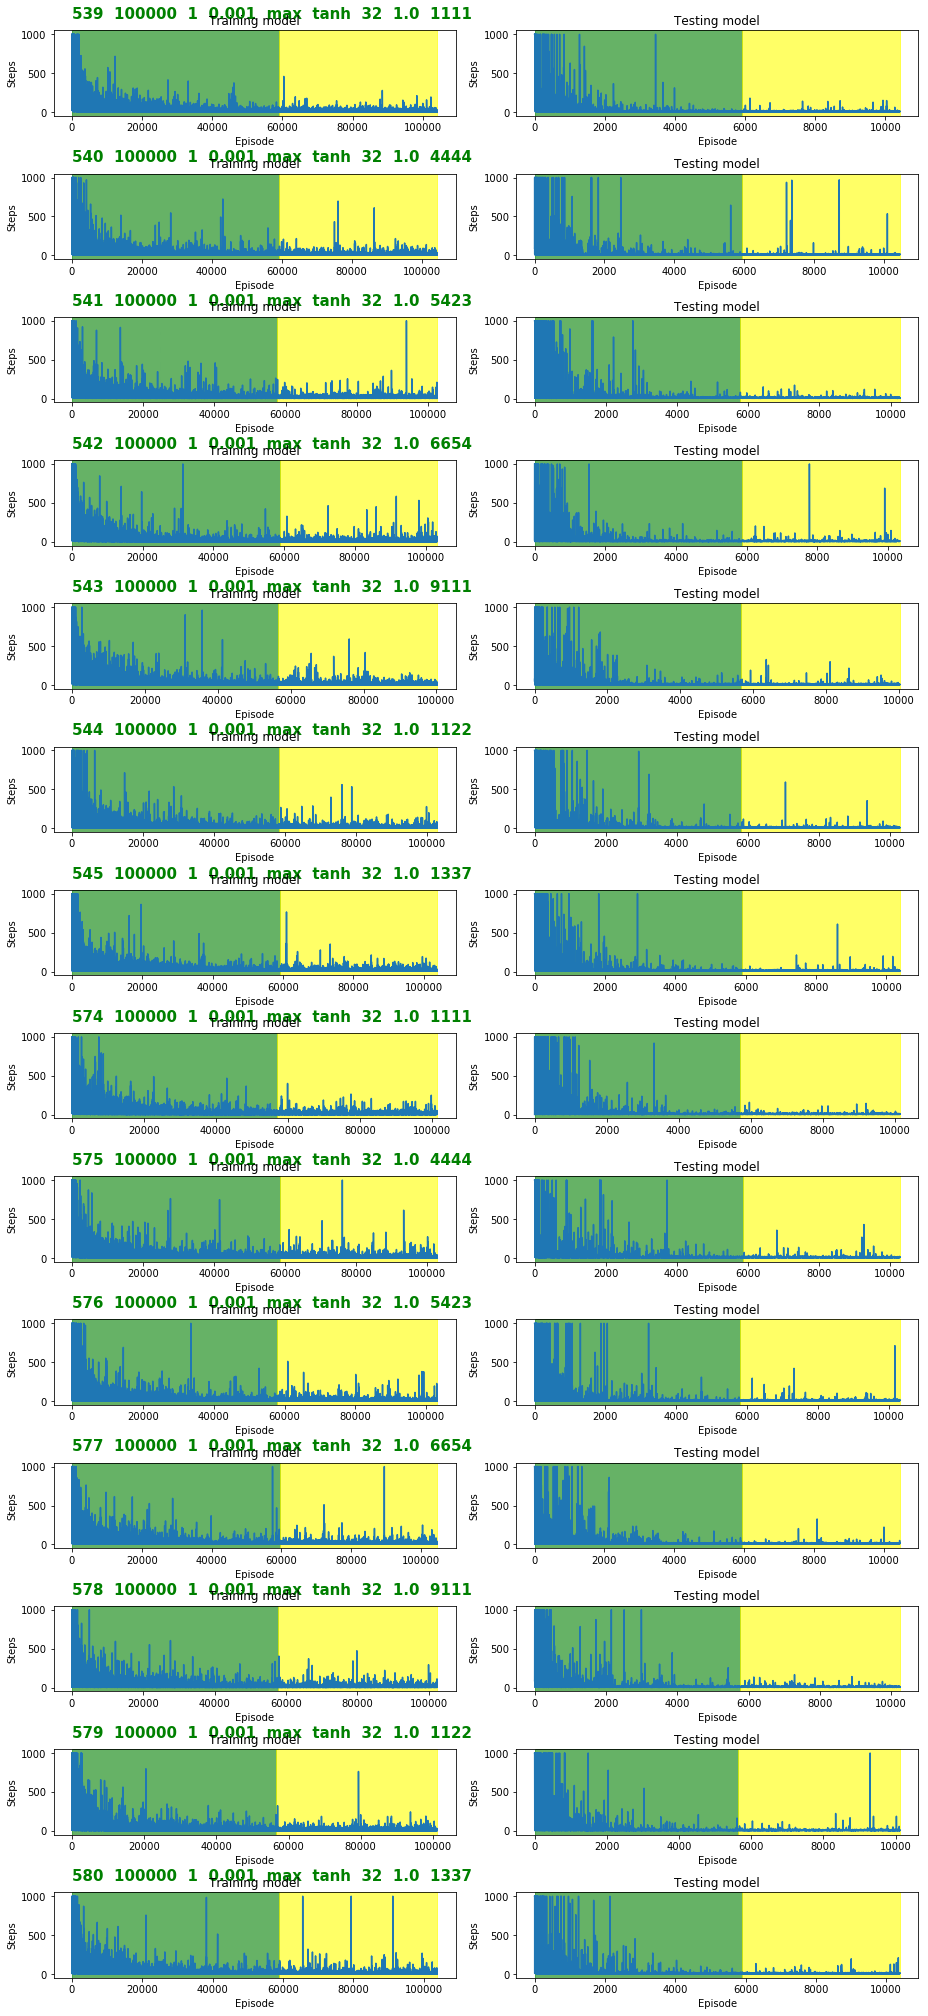

In [36]:
x = expp.shape[0]
y = 2
z=0
print(x,y,z)
plt.figure(figsize=(13,x*2))
for i in log_progress(expp.experiment.as_matrix(),every=1,name='Drawing Experiment'):
    txt = expp[expp.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=expp.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotsteps(i,x,y,z,txt,vanish,False)
    z+=2
plt.tight_layout()

## episode vs reward

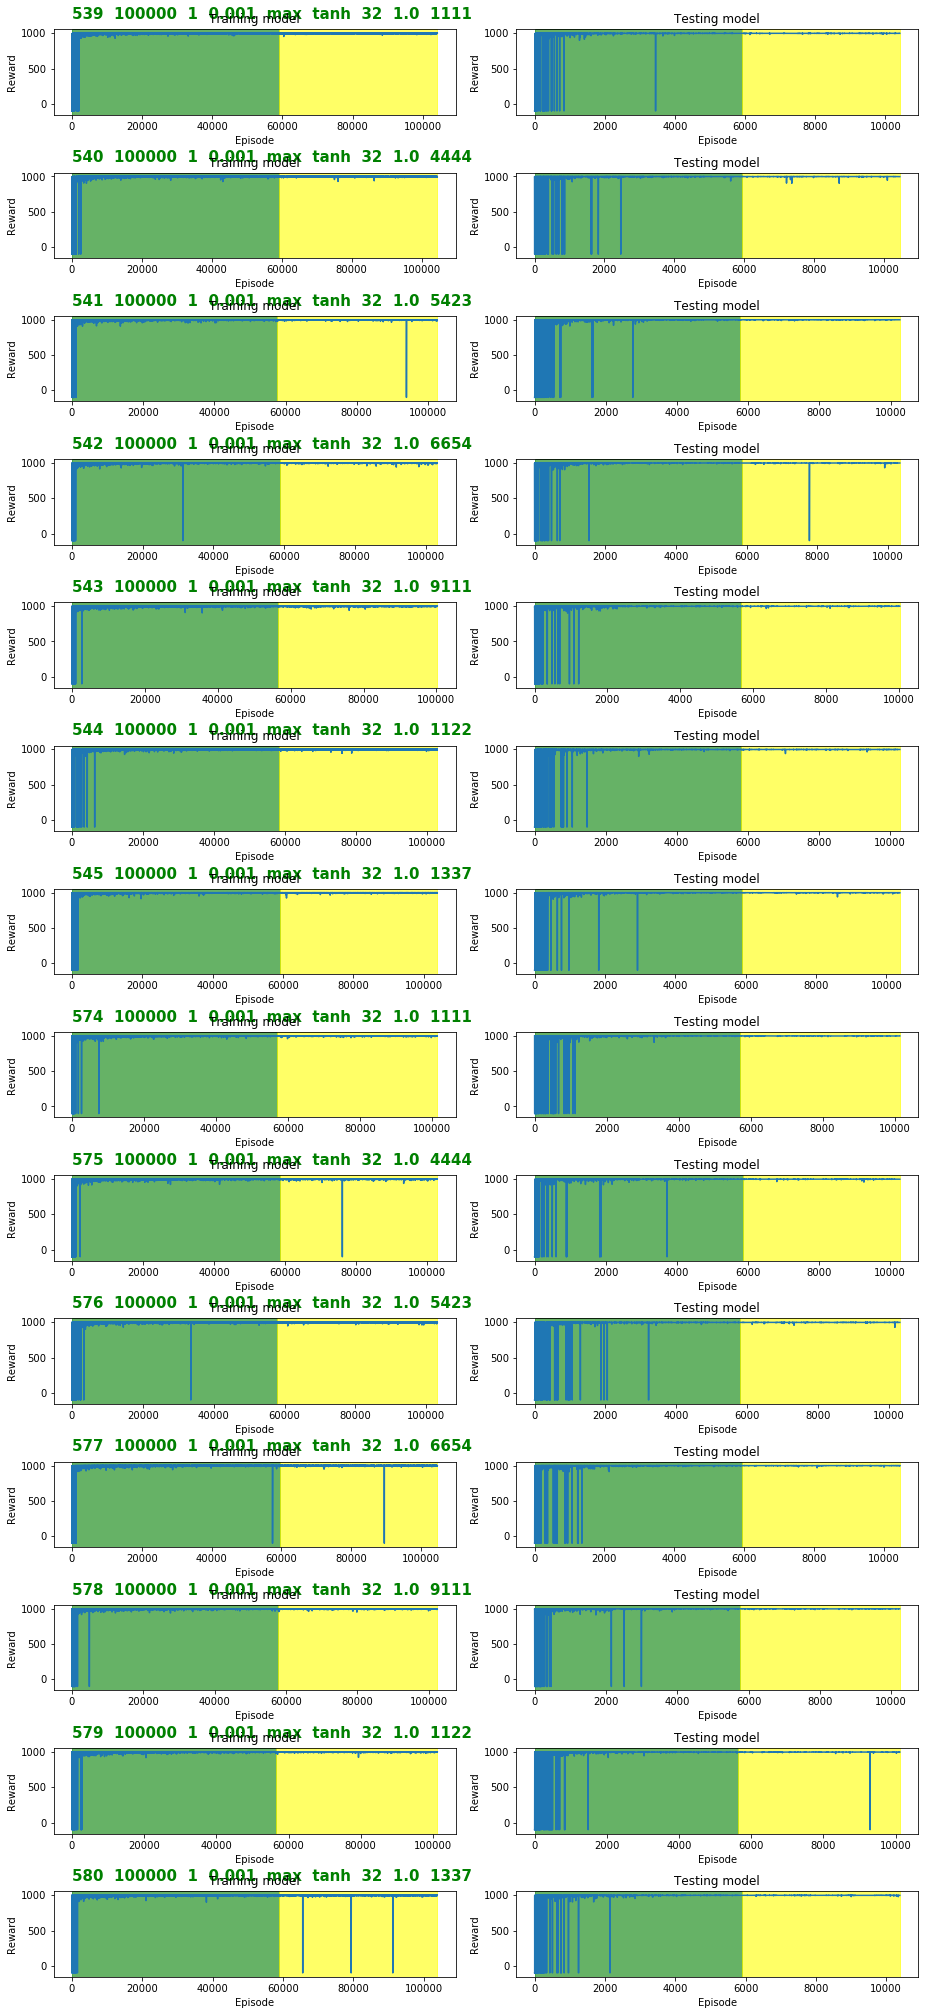

In [37]:
x = expp.shape[0]
y = 2
z=0
plt.figure(figsize=(13,x*2))
for i in log_progress(expp.experiment.as_matrix(),every=1,name='Drawing Experiment'):
    txt = expp[expp.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=expp.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotreward(i,x,y,z,txt,vanish,False)
    z+=2
plt.tight_layout()

In [ ]:
expp = experiements[(experiements.experiment>439)&(experiements.experiment<1000)]
x = expp.shape[0]
y = 2
z=0
plt.figure(figsize=(13,x*2))
for i in log_progress(expp.experiment.as_matrix(),every=1,name='Drawing Experiment'):
    txt = expp[expp.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=expp.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotQvalues(i,x,y,z,txt,vanish,False)
    z+=2
plt.tight_layout()

### This code used for the last 25% (training,testing) (reward,steps) (mean,median)

In [ ]:
#experiements = experiements[experiements.experiment>68]
plt.figure(figsize=(13,30))
WantedScopes=[]
#All Experiments
tmp = experiements[['experiment','tr_SMD', 'tr_SM', 'tr_RMD', 'tr_RM','ts_SMD', 'ts_SM', 'ts_RMD', 'ts_RM','tr_s','ts_s']]
#tmp = tmp.assign(tr_SMD=minmax_scale(tmp.tr_SMD),ts_SMD=minmax_scale(tmp.ts_SMD))
#Steps median
WantedScopes.append((tmp.sort_values('tr_SMD',ascending=True).head(10),'Best train steps Median','tr_SMD','ts_SMD'))
WantedScopes.append((tmp.sort_values('ts_SMD',ascending=True).head(10),'Best test Steps Median','tr_SMD','ts_SMD'))
#Steps Mean
WantedScopes.append((tmp.sort_values('tr_SM',ascending=True).head(10),'Best train steps mean','tr_SM','ts_SM'))
WantedScopes.append((tmp.sort_values('ts_SM',ascending=True).head(10),'Best test steps mean','tr_SM','ts_SM'))
#Reward Median
WantedScopes.append((tmp.sort_values('tr_RMD',ascending=False).head(10),'Best train reward median','tr_RMD','ts_RMD'))
WantedScopes.append((tmp.sort_values('ts_RMD',ascending=False).head(10),'Best test reward median','tr_RMD','ts_RMD'))
#Reward Mean
WantedScopes.append((tmp.sort_values('tr_RM',ascending=False).head(10),'Best train reward mean','tr_RM','ts_RM'))
WantedScopes.append((tmp.sort_values('ts_RM',ascending=False).head(10),'Best test reward mean','tr_RM','ts_RM'))
#
WantedScopes.append((tmp.sort_values('tr_s',ascending=False).head(10),'Best train succeed %','tr_s','ts_s'))
WantedScopes.append((tmp.sort_values('ts_s',ascending=False).head(10),'Best test succeed %','tr_s','ts_s'))

#Top 10 depending on Average Reward for test
#WantedScopes.append((tmp.sort_values('ts_AR',ascending=False).head(10),'For best 10 Testing'))
#Top 10 AR for Training
# WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('tr_AR',ascending=False).head(10),'For best 10 Training'))
counter=1
for tt,strng,x1,x2 in WantedScopes:
    ax = plt.subplot(6,2,counter)
    counter+=1
    ax.scatter(tt[x1],tt[x2])
    ax.set_title(strng,color='red')
    ax.set_xlabel('Training')
    ax.set_ylabel('Testing')
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i][x1],tt.iloc[i][x2]),color='green')
#     ax = plt.subplot(6,2,counter)
#     for i in range(tt.shape[0]):
#         ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AS'],tt.iloc[i]['ts_AS']),color='green')
#     ax.scatter(tt.tr_AS,tt.ts_AS)
#     ax.set_title('Steps,{}'.format(strng),color='red')
#     ax.set_xlabel('Training Average Steps')
#     ax.set_ylabel('Testing Average Steps')
    
#     counter +=1
plt.tight_layout()
# plt.show()